In [1]:
import scipy.stats as stats #importing libraries
import pandas as pd

In [2]:
req=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')  # Reading file

C:\Users\Vaishali\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
 #data wrangling process

In [4]:
req.head()     

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-2016 00:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-2016 01:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-2016 04:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-2016 07:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-2016 03:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
# iterating the columns 
for col in req.columns: 
    print(col) 

Unique Key
Created Date
Closed Date
Agency
Agency Name
Complaint Type
Descriptor
Location Type
Incident Zip
Incident Address
Street Name
Cross Street 1
Cross Street 2
Intersection Street 1
Intersection Street 2
Address Type
City
Landmark
Facility Type
Status
Due Date
Resolution Description
Resolution Action Updated Date
Community Board
Borough
X Coordinate (State Plane)
Y Coordinate (State Plane)
Park Facility Name
Park Borough
School Name
School Number
School Region
School Code
School Phone Number
School Address
School City
School State
School Zip
School Not Found
School or Citywide Complaint
Vehicle Type
Taxi Company Borough
Taxi Pick Up Location
Bridge Highway Name
Bridge Highway Direction
Road Ramp
Bridge Highway Segment
Garage Lot Name
Ferry Direction
Ferry Terminal Name
Latitude
Longitude
Location


In [6]:
del req['School Not Found']
del req['School or Citywide Complaint']
del req['Vehicle Type']
del req['Taxi Company Borough']
del req['Taxi Pick Up Location']
del req['Bridge Highway Name']
del req['Bridge Highway Direction']
del req['Garage Lot Name']
del req['School Phone Number']
del req['School Address']
del req['School Region']
del req['School Code']
del req['School Name']
del req['School Number']
del req['School City']
del req['Park Facility Name']
del req['Unique Key']
del req['Agency']
del req['Agency Name']
del req['Incident Zip']
del req['Incident Address']
del req['Street Name']
del req['Cross Street 1']
del req['Cross Street 2']
del req['Intersection Street 1']
del req['Intersection Street 2']
del req['Address Type']
del req['Landmark']
del req['Facility Type']
del req['Status']
del req['Resolution Description']
del req['X Coordinate (State Plane)']
del req['Y Coordinate (State Plane)']
del req['Road Ramp']
del req['Bridge Highway Segment']
del req['School State']
del req['School Zip']
del req['Latitude']
del req['Longitude']
del req['Park Borough']
del req['Ferry Direction']
del req['Ferry Terminal Name']

In [7]:
req=req.dropna(subset=['Closed Date'])
req=req.dropna(subset=['Descriptor'])
req=req.dropna(subset=['Location Type'])
req=req.dropna(subset=['Location'])


In [8]:
req.head()

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,City,Due Date,Resolution Action Updated Date,Community Board,Borough,Location
0,12/31/2015 11:59:45 PM,01-01-2016 00:55,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NEW YORK,01-01-2016 07:59,01-01-2016 00:55,12 MANHATTAN,MANHATTAN,"(40.86568153633767, -73.92350095571744)"
1,12/31/2015 11:59:44 PM,01-01-2016 01:26,Blocked Driveway,No Access,Street/Sidewalk,ASTORIA,01-01-2016 07:59,01-01-2016 01:26,01 QUEENS,QUEENS,"(40.775945312321085, -73.91509393898605)"
2,12/31/2015 11:59:29 PM,01-01-2016 04:51,Blocked Driveway,No Access,Street/Sidewalk,BRONX,01-01-2016 07:59,01-01-2016 04:51,07 BRONX,BRONX,"(40.870324522111424, -73.88852464418646)"
3,12/31/2015 11:57:46 PM,01-01-2016 07:43,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,BRONX,01-01-2016 07:57,01-01-2016 07:43,10 BRONX,BRONX,"(40.83599404683083, -73.82837939584206)"
4,12/31/2015 11:56:58 PM,01-01-2016 03:24,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ELMHURST,01-01-2016 07:56,01-01-2016 03:24,04 QUEENS,QUEENS,"(40.733059618956815, -73.87416975810375)"


In [9]:
req.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291149 entries, 0 to 300697
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Created Date                    291149 non-null  object
 1   Closed Date                     291149 non-null  object
 2   Complaint Type                  291149 non-null  object
 3   Descriptor                      291149 non-null  object
 4   Location Type                   291149 non-null  object
 5   City                            291109 non-null  object
 6   Due Date                        291149 non-null  object
 7   Resolution Action Updated Date  291147 non-null  object
 8   Community Board                 291149 non-null  object
 9   Borough                         291149 non-null  object
 10  Location                        291149 non-null  object
dtypes: object(11)
memory usage: 26.7+ MB


In [10]:
# Conversion to datetime data type

In [11]:
req['Created Date']=pd.to_datetime(req['Created Date'])       

In [12]:
req['Created Date']

0        2015-12-31 23:59:45
1        2015-12-31 23:59:44
2        2015-12-31 23:59:29
3        2015-12-31 23:57:46
4        2015-12-31 23:56:58
                 ...        
300692   2015-03-29 00:34:32
300694   2015-03-29 00:33:28
300695   2015-03-29 00:33:03
300696   2015-03-29 00:33:02
300697   2015-03-29 00:33:01
Name: Created Date, Length: 291149, dtype: datetime64[ns]

In [13]:
req['Closed Date']=pd.to_datetime(req['Closed Date'])

In [14]:
req.head()

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,City,Due Date,Resolution Action Updated Date,Community Board,Borough,Location
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NEW YORK,01-01-2016 07:59,01-01-2016 00:55,12 MANHATTAN,MANHATTAN,"(40.86568153633767, -73.92350095571744)"
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,No Access,Street/Sidewalk,ASTORIA,01-01-2016 07:59,01-01-2016 01:26,01 QUEENS,QUEENS,"(40.775945312321085, -73.91509393898605)"
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,No Access,Street/Sidewalk,BRONX,01-01-2016 07:59,01-01-2016 04:51,07 BRONX,BRONX,"(40.870324522111424, -73.88852464418646)"
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,BRONX,01-01-2016 07:57,01-01-2016 07:43,10 BRONX,BRONX,"(40.83599404683083, -73.82837939584206)"
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ELMHURST,01-01-2016 07:56,01-01-2016 03:24,04 QUEENS,QUEENS,"(40.733059618956815, -73.87416975810375)"


In [15]:
# Creating column 'Request_Closing_Time' with time elapsed data

In [16]:
import numpy as np    

In [17]:
req['Request_Closing_Time']=req['Closed Date']-req['Created Date']

In [18]:
req.head()

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,City,Due Date,Resolution Action Updated Date,Community Board,Borough,Location,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NEW YORK,01-01-2016 07:59,01-01-2016 00:55,12 MANHATTAN,MANHATTAN,"(40.86568153633767, -73.92350095571744)",00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,No Access,Street/Sidewalk,ASTORIA,01-01-2016 07:59,01-01-2016 01:26,01 QUEENS,QUEENS,"(40.775945312321085, -73.91509393898605)",01:26:16
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,No Access,Street/Sidewalk,BRONX,01-01-2016 07:59,01-01-2016 04:51,07 BRONX,BRONX,"(40.870324522111424, -73.88852464418646)",04:51:31
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,BRONX,01-01-2016 07:57,01-01-2016 07:43,10 BRONX,BRONX,"(40.83599404683083, -73.82837939584206)",07:45:14
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ELMHURST,01-01-2016 07:56,01-01-2016 03:24,04 QUEENS,QUEENS,"(40.733059618956815, -73.87416975810375)",03:27:02


In [19]:
r=pd.DataFrame(req['Complaint Type'])
s=pd.DataFrame(req['Request_Closing_Time'])
t=pd.concat((r,s),axis=1)
d=pd.DataFrame(req['Location'])
e=pd.DataFrame(req['Location Type'])
f=pd.concat((d,e),axis=1)
g=pd.concat((t,f),axis=1)
h=g.sort_values(by ='Request_Closing_Time' , ascending=False)
print("Sorted complaint types based on the average ‘Request_Closing_Time’ : ")
print(h)


Sorted complaint types based on the average ‘Request_Closing_Time’ : 
                 Complaint Type Request_Closing_Time  \
244488  Noise - Street/Sidewalk     24 days 16:52:22   
23664           Illegal Parking     24 days 01:21:36   
21268              Animal Abuse     21 days 15:16:01   
12168          Derelict Vehicle      9 days 07:22:12   
12167          Derelict Vehicle      9 days 07:21:06   
...                         ...                  ...   
260083       Noise - Commercial      0 days 00:02:00   
60357     Posting Advertisement      0 days 00:02:00   
222119  Noise - Street/Sidewalk      0 days 00:02:00   
163683       Noise - Commercial      0 days 00:02:00   
61125        Noise - Commercial      0 days 00:01:00   

                                        Location        Location Type  
244488   (40.68594971751218, -73.95942153955151)      Street/Sidewalk  
23664    (40.59814521498835, -73.98935198928409)      Street/Sidewalk  
21268     (40.6449662497121, -73.99499837

In [20]:
sorted_data=pd.DataFrame(h)                # Data sorted in descending order in datetime type
sorted_data 

,Complaint Type,Request_Closing_Time,Location,Location Type
244488,Noise - Street/Sidewalk,24 days 16:52:22,"(40.68594971751218, -73.95942153955151)",Street/Sidewalk
23664,Illegal Parking,24 days 01:21:36,"(40.59814521498835, -73.98935198928409)",Street/Sidewalk
21268,Animal Abuse,21 days 15:16:01,"(40.6449662497121, -73.99499837340035)",Street/Sidewalk
12168,Derelict Vehicle,9 days 07:22:12,"(40.64496727639598, -73.95897801142875)",Street/Sidewalk
12167,Derelict Vehicle,9 days 07:21:06,"(40.64466438582295, -73.95635848114169)",Street/Sidewalk
...,...,...,...,...
260083,Noise - Commercial,0 days 00:02:00,"(40.73240036503256, -73.9878439553108)",Store/Commercial
60357,Posting Advertisement,0 days 00:02:00,"(40.549093797686275, -74.17363282481907)",Street/Sidewalk
222119,Noise - Street/Sidewalk,0 days 00:02:00,"(40.62977454750427, -74.11726652408944)",Street/Sidewalk
163683,Noise - Commercial,0 days 00:02:00,"(40.703813419626954, -73.94195083019125)",Store/Commercial


In [21]:
sorted_data.head()

,Complaint Type,Request_Closing_Time,Location,Location Type
244488,Noise - Street/Sidewalk,24 days 16:52:22,"(40.68594971751218, -73.95942153955151)",Street/Sidewalk
23664,Illegal Parking,24 days 01:21:36,"(40.59814521498835, -73.98935198928409)",Street/Sidewalk
21268,Animal Abuse,21 days 15:16:01,"(40.6449662497121, -73.99499837340035)",Street/Sidewalk
12168,Derelict Vehicle,9 days 07:22:12,"(40.64496727639598, -73.95897801142875)",Street/Sidewalk
12167,Derelict Vehicle,9 days 07:21:06,"(40.64466438582295, -73.95635848114169)",Street/Sidewalk


In [22]:
sorted_data.tail()

,Complaint Type,Request_Closing_Time,Location,Location Type
260083,Noise - Commercial,00:02:00,"(40.73240036503256, -73.9878439553108)",Store/Commercial
60357,Posting Advertisement,00:02:00,"(40.549093797686275, -74.17363282481907)",Street/Sidewalk
222119,Noise - Street/Sidewalk,00:02:00,"(40.62977454750427, -74.11726652408944)",Street/Sidewalk
163683,Noise - Commercial,00:02:00,"(40.703813419626954, -73.94195083019125)",Store/Commercial
61125,Noise - Commercial,00:01:00,"(40.726422494913116, -73.9900025591503)",Club/Bar/Restaurant


In [23]:
req['Request_Closing_Time']=req['Request_Closing_Time'].astype('timedelta64[h]')

In [24]:
req.head()

,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,City,Due Date,Resolution Action Updated Date,Community Board,Borough,Location,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,NEW YORK,01-01-2016 07:59,01-01-2016 00:55,12 MANHATTAN,MANHATTAN,"(40.86568153633767, -73.92350095571744)",0.0
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,No Access,Street/Sidewalk,ASTORIA,01-01-2016 07:59,01-01-2016 01:26,01 QUEENS,QUEENS,"(40.775945312321085, -73.91509393898605)",1.0
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,No Access,Street/Sidewalk,BRONX,01-01-2016 07:59,01-01-2016 04:51,07 BRONX,BRONX,"(40.870324522111424, -73.88852464418646)",4.0
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,BRONX,01-01-2016 07:57,01-01-2016 07:43,10 BRONX,BRONX,"(40.83599404683083, -73.82837939584206)",7.0
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,ELMHURST,01-01-2016 07:56,01-01-2016 03:24,04 QUEENS,QUEENS,"(40.733059618956815, -73.87416975810375)",3.0


In [25]:
req.shape

(291149, 12)

In [26]:
req.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291149 entries, 0 to 300697
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Created Date                    291149 non-null  datetime64[ns]
 1   Closed Date                     291149 non-null  datetime64[ns]
 2   Complaint Type                  291149 non-null  object        
 3   Descriptor                      291149 non-null  object        
 4   Location Type                   291149 non-null  object        
 5   City                            291109 non-null  object        
 6   Due Date                        291149 non-null  object        
 7   Resolution Action Updated Date  291147 non-null  object        
 8   Community Board                 291149 non-null  object        
 9   Borough                         291149 non-null  object        
 10  Location                        291149 non-null  object 

In [27]:
# Creating visualization insights process

In [28]:
req['Complaint Type'].unique()        

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'],
      dtype=object)

In [29]:
a=req['Complaint Type'].value_counts()  
a

Blocked Driveway            76677
Illegal Parking             74024
Noise - Street/Sidewalk     47770
Noise - Commercial          35156
Derelict Vehicle            17506
Noise - Vehicle             16868
Animal Abuse                 7744
Traffic                      4469
Noise - Park                 3927
Vending                      3773
Drinking                     1270
Noise - House of Worship      920
Posting Advertisement         647
Disorderly Youth              285
Graffiti                      113
Name: Complaint Type, dtype: int64

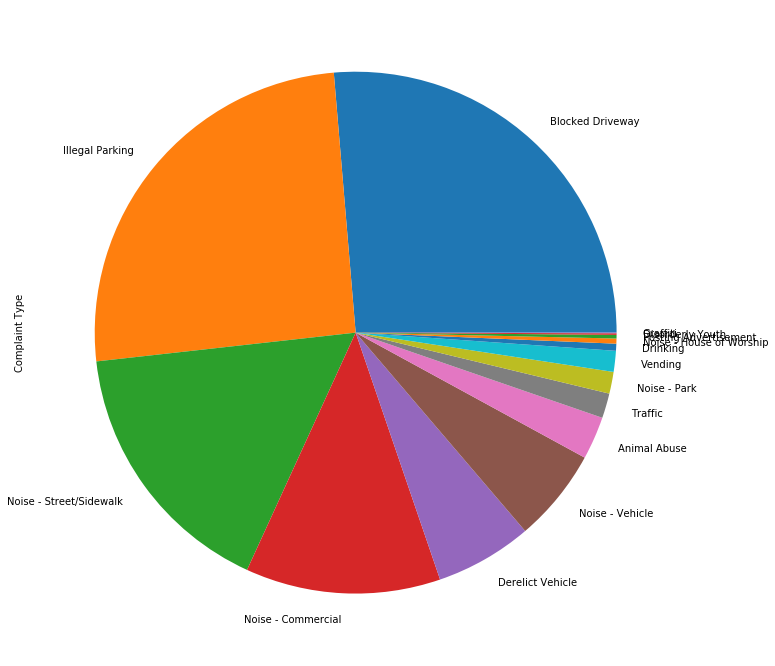

In [30]:
a.plot.pie(figsize=(12,12))     #Distribution of complaint types

In [31]:
#CONCLUSION:1
#From the above insight
#Amount of Blocked driveway,illegal parking,Noise - Street/Sidewalk and Noise - Commercial  complaint type is more, so major action should be taken on these complaint types by relevant department to avoid much of these complaints in future

In [32]:
b=req['City'].value_counts()

In [33]:
b

BROOKLYN               96858
NEW YORK               61936
BRONX                  40217
STATEN ISLAND          12211
JAMAICA                 7155
ASTORIA                 6254
FLUSHING                5916
RIDGEWOOD               5124
CORONA                  4265
WOODSIDE                3493
SOUTH RICHMOND HILL     2759
OZONE PARK              2733
EAST ELMHURST           2724
ELMHURST                2624
WOODHAVEN               2448
MASPETH                 2445
LONG ISLAND CITY        2408
SOUTH OZONE PARK        2165
FRESH MEADOWS           1886
RICHMOND HILL           1865
QUEENS VILLAGE          1788
MIDDLE VILLAGE          1759
JACKSON HEIGHTS         1671
FOREST HILLS            1655
REGO PARK               1477
COLLEGE POINT           1216
BAYSIDE                 1214
FAR ROCKAWAY            1163
WHITESTONE              1093
HOLLIS                   998
HOWARD BEACH             921
ROSEDALE                 913
SPRINGFIELD GARDENS      871
SAINT ALBANS             825
KEW GARDENS   

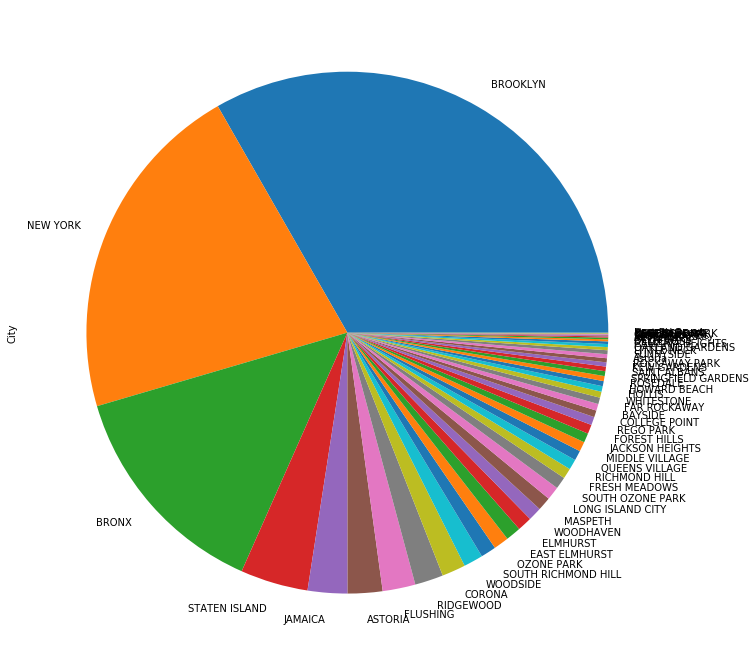

In [34]:
b.plot.pie(figsize=(12,12))         # Distribution of complaint raising cities

In [35]:
#CONCLUSION:2
#From the above insight
#NYC 311 should provide immediate service in most complaint raising cities like Brooklyn,New York and Bronx to resolve the complaints with minimal elapsed time

In [36]:
c=req['Location Type'].value_counts()

In [37]:
c

Street/Sidewalk               242792
Store/Commercial               19436
Club/Bar/Restaurant            17173
Residential Building/House      5753
Park/Playground                 4246
House of Worship                 920
Residential Building             226
Highway                          199
Parking Lot                      116
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    34
Subway Station                    22
Name: Location Type, dtype: int64

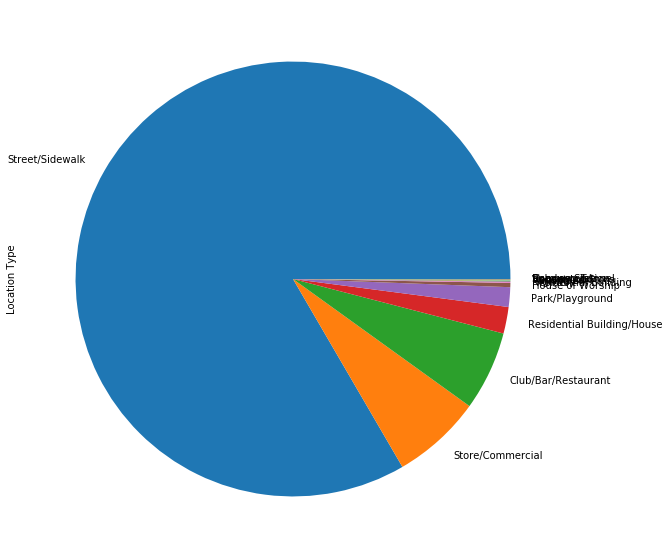

In [38]:
c.plot.pie(figsize=(10,10))  # Distribution of complaint raising location type

In [39]:
#CONCLUSION:3
#From the above insight
# Majority of complaint raised regarding Street/Sidewalk, so NYC 311 mission should take care more and resolve issues such that no complaints raise from this location type

In [40]:
dp=req['Descriptor'].value_counts()
dp

Loud Music/Party                  60477
No Access                         56725
Posted Parking Sign Violation     22104
Loud Talking                      21255
Partial Access                    19952
With License Plate                17506
Blocked Hydrant                   15837
Commercial Overnight Parking      11908
Car/Truck Music                   11114
Blocked Sidewalk                  10931
Double Parked Blocking Traffic     5559
Double Parked Blocking Vehicle     4147
Engine Idling                      4134
Banging/Pounding                   4091
Neglected                          3771
Car/Truck Horn                     3477
Congestion/Gridlock                2739
In Prohibited Area                 2017
Other (complaint details)          1961
Unlicensed                         1756
Overnight Commercial Storage       1746
Unauthorized Bus Layover           1333
Truck Route Violation              1010
In Public                           923
Tortured                            849


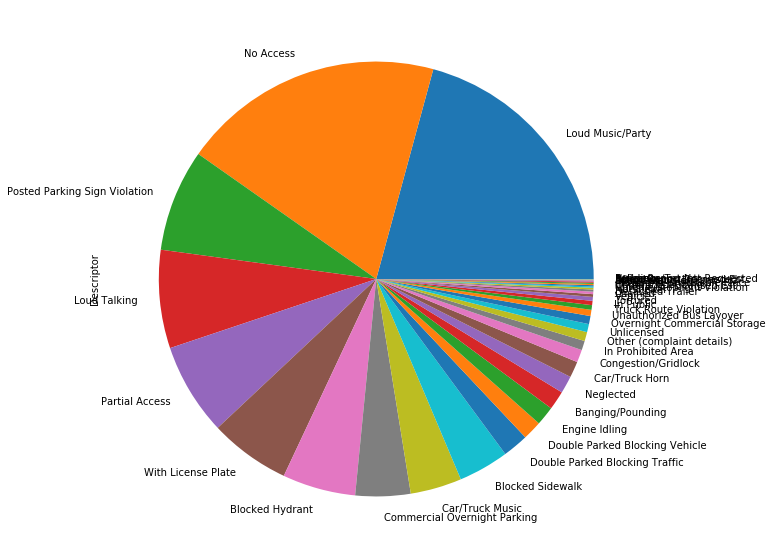

In [41]:
dp.plot.pie(figsize=(10,10))             # Distribution of complaints among lacation types

In [42]:
#CONCLUSION:4
#From the above insight
#Most of the complaints occured due to loud music/party and no access

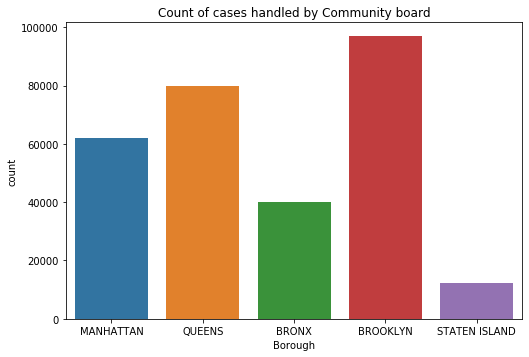

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
plt.subplot(221)
plt.title('Count of cases handled by Community board')
sns.countplot(req['Borough'])

In [44]:
#CONCLUSION:5
#From the above insight
# Number of cases handled by Brooklyn community board is greater among the other community boards

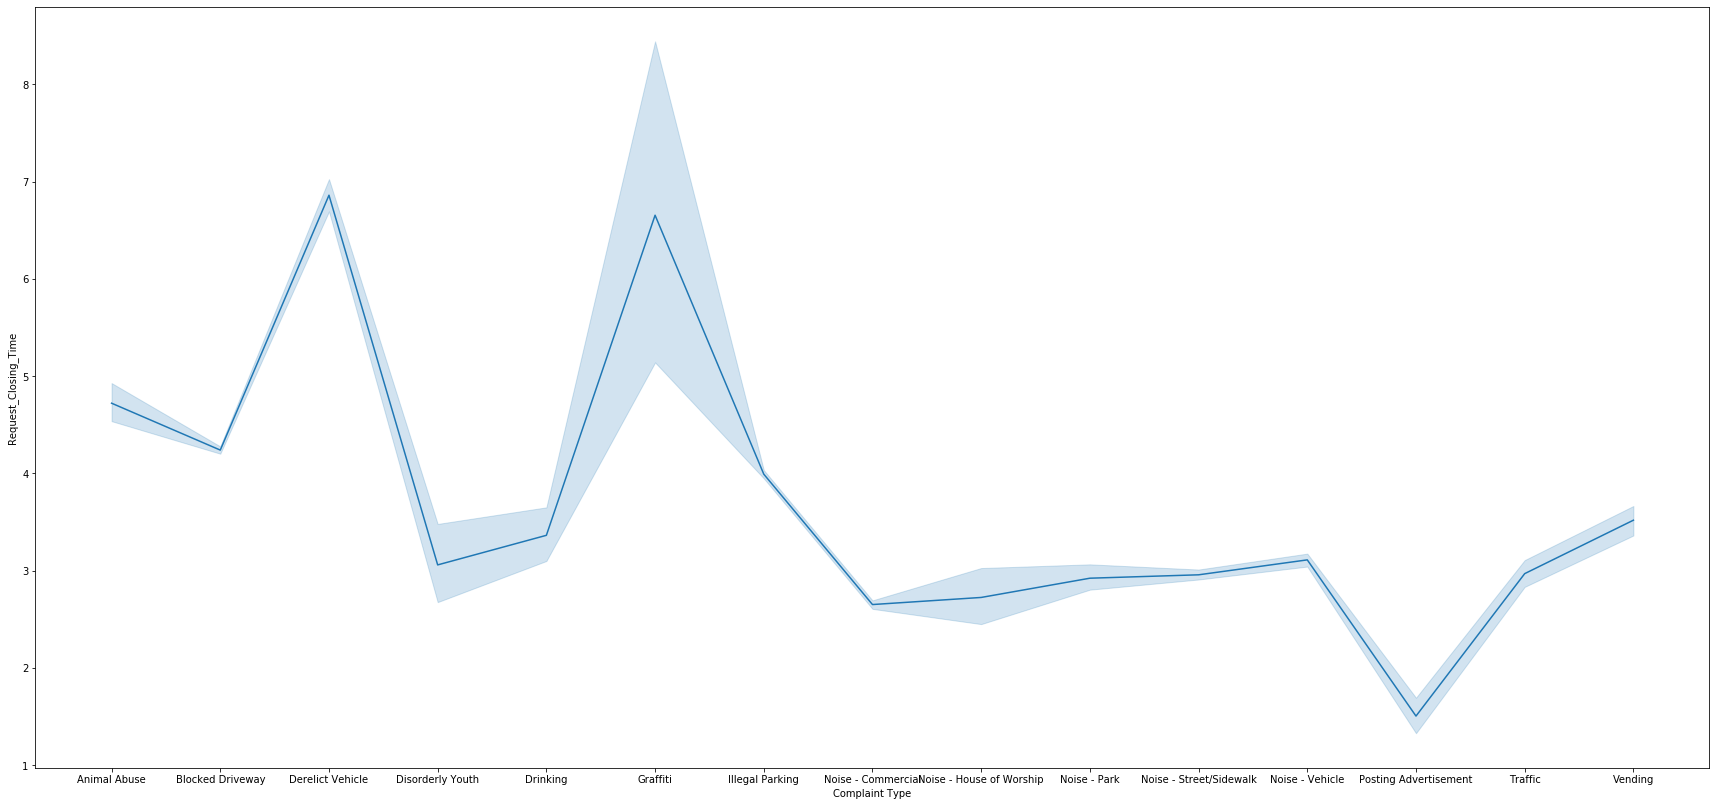

In [45]:
plt.figure(figsize=(30,14))                                                                
sns.lineplot(x = req['Complaint Type'], y = req['Request_Closing_Time']) #lineplot-for time series data

In [48]:
#CONCLUSION:6
#From the above insight
#Graffiti complaint type has more response closing time

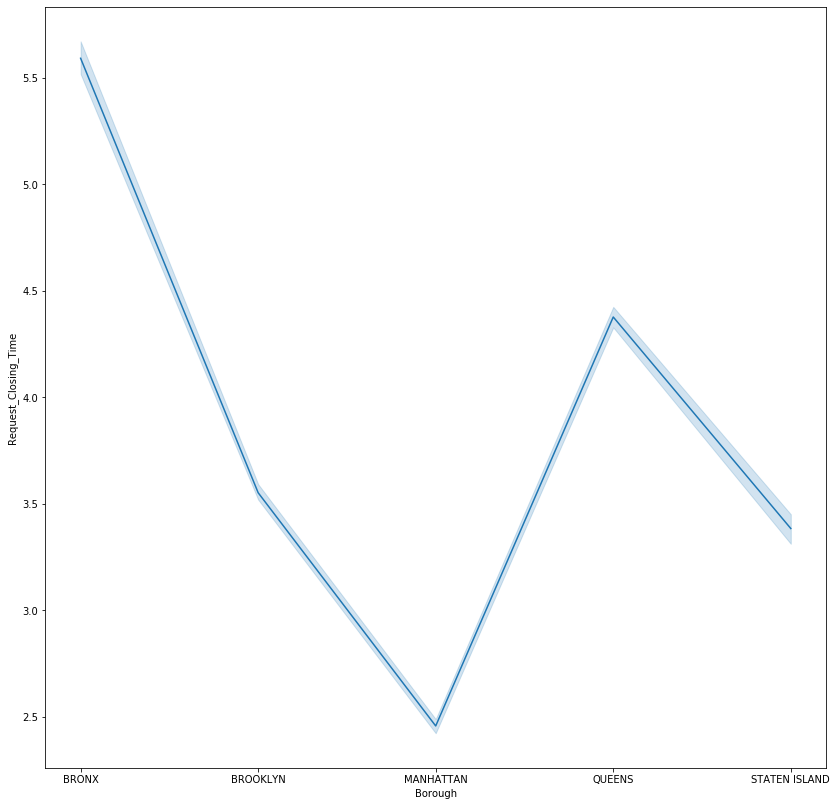

In [49]:
plt.figure(figsize=(14,14))                                                                
sns.lineplot(x = req['Borough'], y = req['Request_Closing_Time'])

In [50]:
#CONCLUSION:6
#From the above insight
#Manhattan community board has less closing response time
#Bronx community board has more closing response time

<Figure size 3600x1008 with 0 Axes>

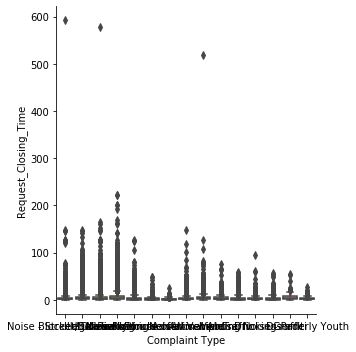

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50,14))
sns.catplot(x="Complaint Type", y="Request_Closing_Time", kind="box", data=req)

<Figure size 1008x1008 with 0 Axes>

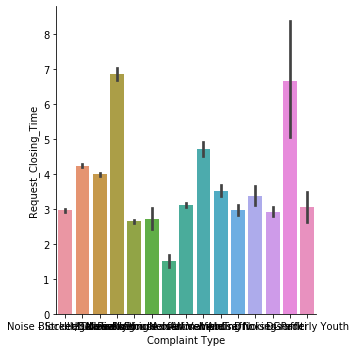

In [52]:
plt.figure(figsize=(14,14))
sns.catplot(x="Complaint Type", y="Request_Closing_Time",  kind="bar", data=req)

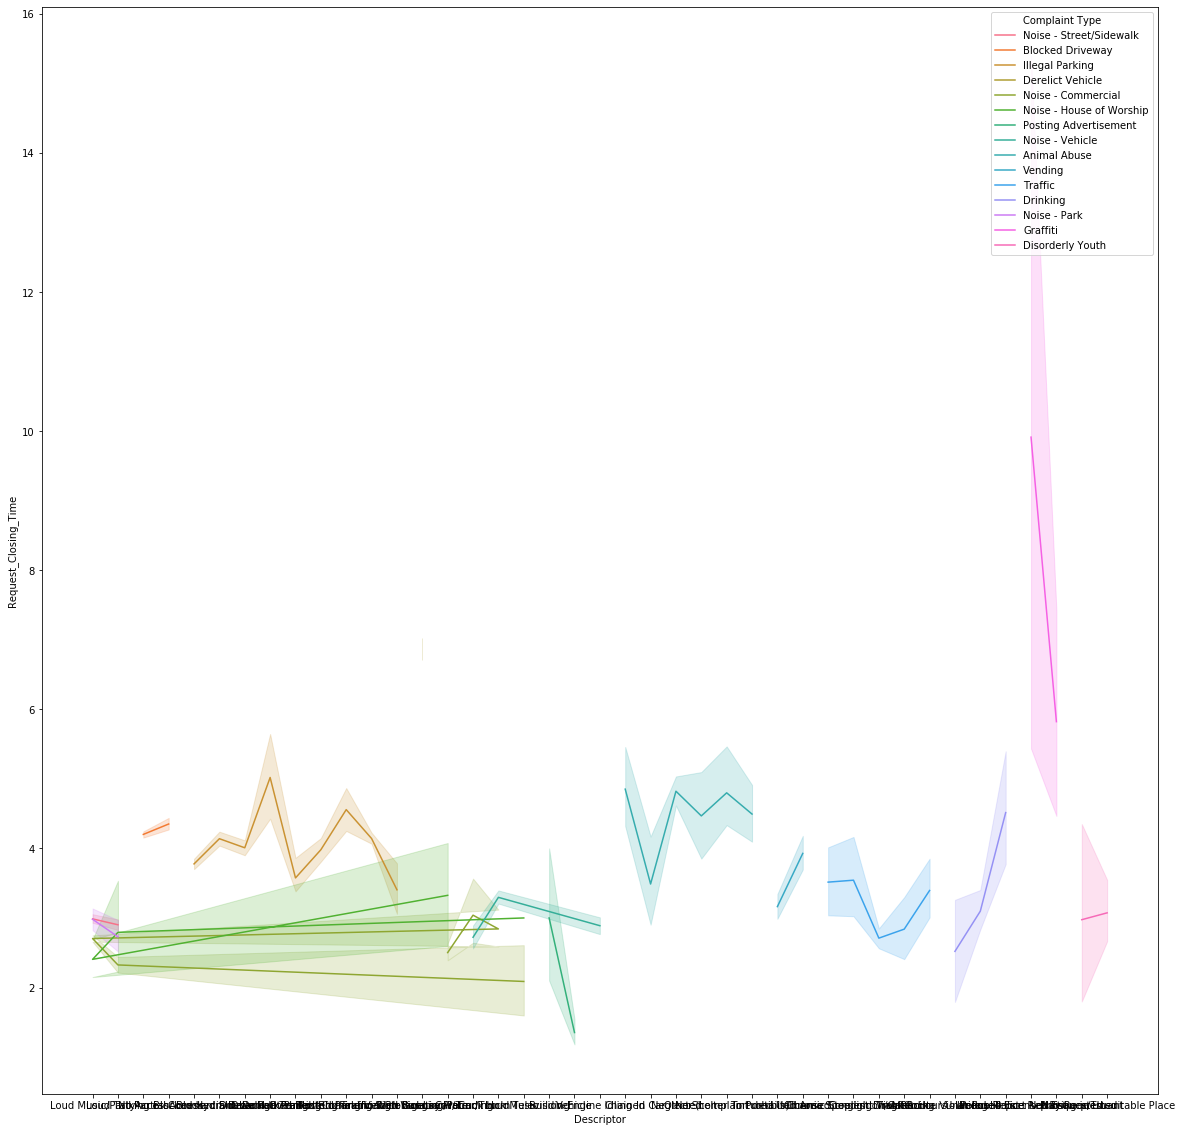

In [53]:
plt.figure(figsize=(20,20)) 
sns.lineplot(x="Descriptor", y="Request_Closing_Time", hue="Complaint Type",
                  data=req)

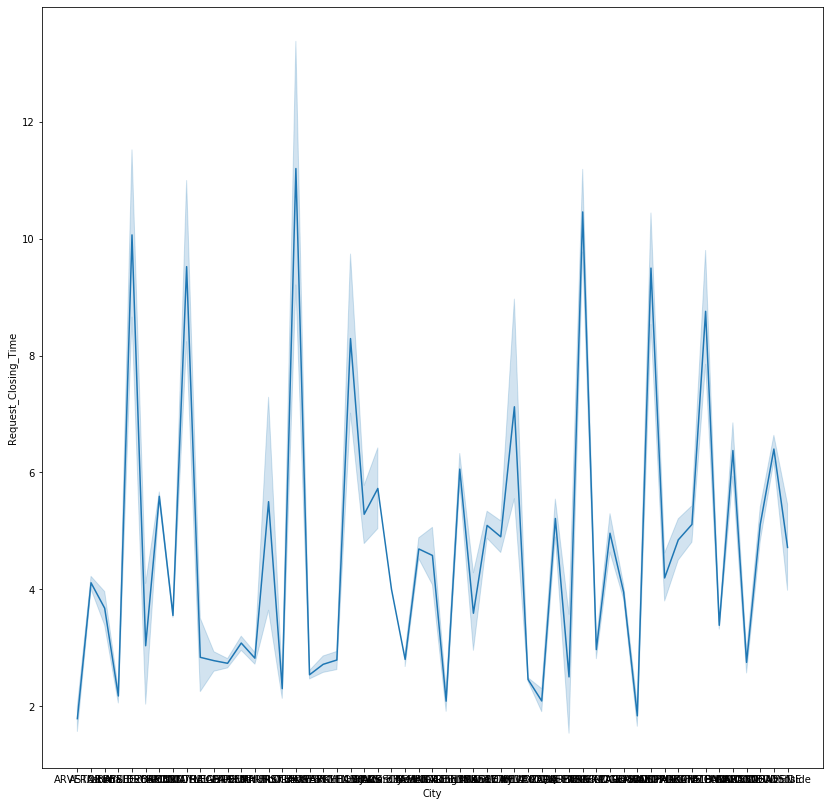

In [54]:
plt.figure(figsize=(14,14))                                                                
sns.lineplot(x = req['City'], y = req['Request_Closing_Time'])

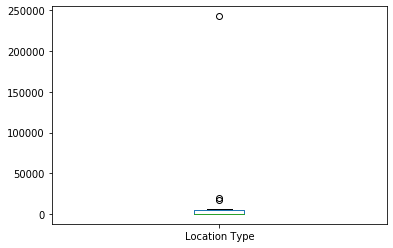

In [55]:
c.plot.box()

In [56]:
r=pd.DataFrame(req['Complaint Type'])
u=pd.DataFrame(req['Request_Closing_Time'])
v=pd.concat((r,u),axis=1)
v

,Complaint Type,Request_Closing_Time
0,Noise - Street/Sidewalk,0.0
1,Blocked Driveway,1.0
2,Blocked Driveway,4.0
3,Illegal Parking,7.0
4,Illegal Parking,3.0
...,...,...
300692,Noise - Commercial,0.0
300694,Blocked Driveway,2.0
300695,Noise - Commercial,3.0
300696,Noise - Commercial,4.0


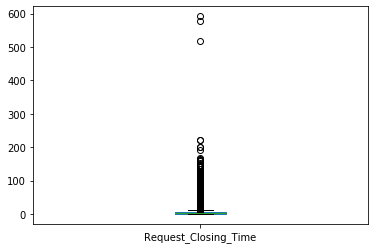

In [57]:
v.plot.box()

In [58]:
j=pd.DataFrame(req['Complaint Type'])
k=pd.DataFrame(req['Descriptor'])
l=pd.concat((j,k),axis=1)
l

,Complaint Type,Descriptor
0,Noise - Street/Sidewalk,Loud Music/Party
1,Blocked Driveway,No Access
2,Blocked Driveway,No Access
3,Illegal Parking,Commercial Overnight Parking
4,Illegal Parking,Blocked Sidewalk
...,...,...
300692,Noise - Commercial,Loud Music/Party
300694,Blocked Driveway,Partial Access
300695,Noise - Commercial,Loud Music/Party
300696,Noise - Commercial,Loud Music/Party


In [59]:
rep_table=l.groupby(['Complaint Type','Descriptor'])
print("\\Descriptors of particular Complaint Type\\")
rep_table.first()

\Descriptors of particular Complaint Type\


Empty DataFrame
Columns: []
Index: [(Animal Abuse, Chained), (Animal Abuse, In Car), (Animal Abuse, Neglected), (Animal Abuse, No Shelter), (Animal Abuse, Other (complaint details)), (Animal Abuse, Tortured), (Blocked Driveway, No Access), (Blocked Driveway, Partial Access), (Derelict Vehicle, With License Plate), (Disorderly Youth, Nuisance/Truant), (Disorderly Youth, Playing in Unsuitable Place), (Drinking, After Hours - Licensed Est), (Drinking, In Public), (Drinking, Underage - Licensed Est), (Graffiti, Police Report Not Requested), (Graffiti, Police Report Requested), (Illegal Parking, Blocked Hydrant), (Illegal Parking, Blocked Sidewalk), (Illegal Parking, Commercial Overnight Parking), (Illegal Parking, Detached Trailer), (Illegal Parking, Double Parked Blocking Traffic), (Illegal Parking, Double Parked Blocking Vehicle), (Illegal Parking, Overnight Commercial Storage), (Illegal Parking, Posted Parking Sign Violation), (Illegal Parking, Unauthorized Bus Layover), (Noise - Commercial, Banging/Pounding), (Noise - Commercial, Car/Truck Horn), (Noise - Commercial, Car/Truck Music), (Noise - Commercial, Loud Music/Party), (Noise - Commercial, Loud Talking), (Noise - Commercial, Loud Television), (Noise - House of Worship, Banging/Pounding), (Noise - House of Worship, Loud Music/Party), (Noise - House of Worship, Loud Talking), (Noise - House of Worship, Loud Television), (Noise - Park, Loud Music/Party), (Noise - Park, Loud Talking), (Noise - Street/Sidewalk, Loud Music/Party), (Noise - Street/Sidewalk, Loud Talking), (Noise - Vehicle, Car/Truck Horn), (Noise - Vehicle, Car/Truck Music), (Noise - Vehicle, Engine Idling), (Posting Advertisement, Building), (Posting Advertisement, Vehicle), (Traffic, Chronic Speeding), (Traffic, Chronic Stoplight Violation), (Traffic, Congestion/Gridlock), (Traffic, Drag Racing), (Traffic, Truck Route Violation), (Vending, In Prohibited Area), (Vending, Unlicensed)]

In [60]:
#Order the complaint types based on the average ‘Request_Closing_Time’

In [61]:
d=pd.DataFrame(req['Location'])
d

,Location
0,"(40.86568153633767, -73.92350095571744)"
1,"(40.775945312321085, -73.91509393898605)"
2,"(40.870324522111424, -73.88852464418646)"
3,"(40.83599404683083, -73.82837939584206)"
4,"(40.733059618956815, -73.87416975810375)"
...,...
300692,"(40.71605290789855, -73.99137850370803)"
300694,"(40.69407728322387, -73.8460866160573)"
300695,"(40.69959035300927, -73.94423377144169)"
300696,"(40.8377075854206, -73.83458731019586)"


In [62]:
e=pd.DataFrame(req['Location Type'])
e

,Location Type
0,Street/Sidewalk
1,Street/Sidewalk
2,Street/Sidewalk
3,Street/Sidewalk
4,Street/Sidewalk
...,...
300692,Store/Commercial
300694,Street/Sidewalk
300695,Club/Bar/Restaurant
300696,Club/Bar/Restaurant


In [63]:
f=pd.concat((d,e),axis=1)
f

,Location,Location Type
0,"(40.86568153633767, -73.92350095571744)",Street/Sidewalk
1,"(40.775945312321085, -73.91509393898605)",Street/Sidewalk
2,"(40.870324522111424, -73.88852464418646)",Street/Sidewalk
3,"(40.83599404683083, -73.82837939584206)",Street/Sidewalk
4,"(40.733059618956815, -73.87416975810375)",Street/Sidewalk
...,...,...
300692,"(40.71605290789855, -73.99137850370803)",Store/Commercial
300694,"(40.69407728322387, -73.8460866160573)",Street/Sidewalk
300695,"(40.69959035300927, -73.94423377144169)",Club/Bar/Restaurant
300696,"(40.8377075854206, -73.83458731019586)",Club/Bar/Restaurant


In [64]:
g=pd.concat((v,f),axis=1)
g

,Complaint Type,Request_Closing_Time,Location,Location Type
0,Noise - Street/Sidewalk,0.0,"(40.86568153633767, -73.92350095571744)",Street/Sidewalk
1,Blocked Driveway,1.0,"(40.775945312321085, -73.91509393898605)",Street/Sidewalk
2,Blocked Driveway,4.0,"(40.870324522111424, -73.88852464418646)",Street/Sidewalk
3,Illegal Parking,7.0,"(40.83599404683083, -73.82837939584206)",Street/Sidewalk
4,Illegal Parking,3.0,"(40.733059618956815, -73.87416975810375)",Street/Sidewalk
...,...,...,...,...
300692,Noise - Commercial,0.0,"(40.71605290789855, -73.99137850370803)",Store/Commercial
300694,Blocked Driveway,2.0,"(40.69407728322387, -73.8460866160573)",Street/Sidewalk
300695,Noise - Commercial,3.0,"(40.69959035300927, -73.94423377144169)",Club/Bar/Restaurant
300696,Noise - Commercial,4.0,"(40.8377075854206, -73.83458731019586)",Club/Bar/Restaurant


In [65]:
w=g.sort_values(by ='Request_Closing_Time' , ascending=False)
print("Sorted complaint types based on the average ‘Request_Closing_Time’- timedelta64[h] type : ")
print(w)

Sorted complaint types based on the average ‘Request_Closing_Time’- timedelta64[h] type : 
                 Complaint Type  Request_Closing_Time  \
244488  Noise - Street/Sidewalk                 592.0   
23664           Illegal Parking                 577.0   
21268              Animal Abuse                 519.0   
12167          Derelict Vehicle                 223.0   
12168          Derelict Vehicle                 223.0   
...                         ...                   ...   
58628           Illegal Parking                   0.0   
58630           Illegal Parking                   0.0   
214152         Derelict Vehicle                   0.0   
58632        Noise - Commercial                   0.0   
0       Noise - Street/Sidewalk                   0.0   

                                        Location     Location Type  
244488   (40.68594971751218, -73.95942153955151)   Street/Sidewalk  
23664    (40.59814521498835, -73.98935198928409)   Street/Sidewalk  
21268     (40.644

In [66]:
sorted_data_timedelta=pd.DataFrame(w)                # Data sorted in descending order in timedelta64[h] type
sorted_data_timedelta                                

,Complaint Type,Request_Closing_Time,Location,Location Type
244488,Noise - Street/Sidewalk,592.0,"(40.68594971751218, -73.95942153955151)",Street/Sidewalk
23664,Illegal Parking,577.0,"(40.59814521498835, -73.98935198928409)",Street/Sidewalk
21268,Animal Abuse,519.0,"(40.6449662497121, -73.99499837340035)",Street/Sidewalk
12167,Derelict Vehicle,223.0,"(40.64466438582295, -73.95635848114169)",Street/Sidewalk
12168,Derelict Vehicle,223.0,"(40.64496727639598, -73.95897801142875)",Street/Sidewalk
...,...,...,...,...
58628,Illegal Parking,0.0,"(40.708350537556264, -74.01432301504705)",Street/Sidewalk
58630,Illegal Parking,0.0,"(40.63337122651426, -74.02994690041785)",Street/Sidewalk
214152,Derelict Vehicle,0.0,"(40.69094298227469, -73.79059076173479)",Street/Sidewalk
58632,Noise - Commercial,0.0,"(40.67131741387195, -73.79037840758853)",Store/Commercial


In [67]:
sorted_data_timedelta.head()

,Complaint Type,Request_Closing_Time,Location,Location Type
244488,Noise - Street/Sidewalk,592.0,"(40.68594971751218, -73.95942153955151)",Street/Sidewalk
23664,Illegal Parking,577.0,"(40.59814521498835, -73.98935198928409)",Street/Sidewalk
21268,Animal Abuse,519.0,"(40.6449662497121, -73.99499837340035)",Street/Sidewalk
12167,Derelict Vehicle,223.0,"(40.64466438582295, -73.95635848114169)",Street/Sidewalk
12168,Derelict Vehicle,223.0,"(40.64496727639598, -73.95897801142875)",Street/Sidewalk


In [68]:
sorted_data_timedelta.tail()

,Complaint Type,Request_Closing_Time,Location,Location Type
58628,Illegal Parking,0.0,"(40.708350537556264, -74.01432301504705)",Street/Sidewalk
58630,Illegal Parking,0.0,"(40.63337122651426, -74.02994690041785)",Street/Sidewalk
214152,Derelict Vehicle,0.0,"(40.69094298227469, -73.79059076173479)",Street/Sidewalk
58632,Noise - Commercial,0.0,"(40.67131741387195, -73.79037840758853)",Store/Commercial
0,Noise - Street/Sidewalk,0.0,"(40.86568153633767, -73.92350095571744)",Street/Sidewalk


In [69]:
# grouping them for different locations

In [70]:
n=sorted_data_timedelta.groupby(['Location'])
grp=n.first()
grp

,Complaint Type,Request_Closing_Time,Location Type
Location,,,
"(40.49913462101514, -74.24348482977875)",Illegal Parking,0.0,Street/Sidewalk
"(40.49967332981336, -74.2379063249761)",Derelict Vehicle,0.0,Street/Sidewalk
"(40.49994886080869, -74.23740031497493)",Illegal Parking,10.0,Street/Sidewalk
"(40.49999700116009, -74.23801175120917)",Illegal Parking,15.0,Street/Sidewalk
"(40.50002168207532, -74.23802262609722)",Illegal Parking,1.0,Street/Sidewalk
...,...,...,...
"(40.91214873879165, -73.9013525396225)",Blocked Driveway,9.0,Street/Sidewalk
"(40.91218391108232, -73.90075914042282)",Blocked Driveway,2.0,Street/Sidewalk
"(40.91220586223159, -73.90075187169981)",Illegal Parking,2.0,Street/Sidewalk


In [71]:
desc=grp.sort_values(by ='Request_Closing_Time' , ascending=False)
print(desc)

                                                   Complaint Type  \
Location                                                            
(40.68594971751218, -73.95942153955151)   Noise - Street/Sidewalk   
(40.59814521498835, -73.98935198928409)           Illegal Parking   
(40.6449662497121, -73.99499837340035)               Animal Abuse   
(40.64496727639598, -73.95897801142875)          Derelict Vehicle   
(40.64466438582295, -73.95635848114169)          Derelict Vehicle   
...                                                           ...   
(40.67758808833756, -73.84307102814279)          Derelict Vehicle   
(40.72839728794634, -73.87259465293221)           Illegal Parking   
(40.72839813491286, -73.98468408707379)           Illegal Parking   
(40.607330721593435, -73.97954018527524)  Noise - Street/Sidewalk   
(40.49913462101514, -74.24348482977875)           Illegal Parking   

                                          Request_Closing_Time  \
Location                            

In [72]:
grp_loc=pd.DataFrame(desc)

In [73]:
grp_loc                                  # Grouped data for different locations

,Complaint Type,Request_Closing_Time,Location Type
Location,,,
"(40.68594971751218, -73.95942153955151)",Noise - Street/Sidewalk,592.0,Street/Sidewalk
"(40.59814521498835, -73.98935198928409)",Illegal Parking,577.0,Street/Sidewalk
"(40.6449662497121, -73.99499837340035)",Animal Abuse,519.0,Street/Sidewalk
"(40.64496727639598, -73.95897801142875)",Derelict Vehicle,223.0,Street/Sidewalk
"(40.64466438582295, -73.95635848114169)",Derelict Vehicle,223.0,Street/Sidewalk
...,...,...,...
"(40.67758808833756, -73.84307102814279)",Derelict Vehicle,0.0,Street/Sidewalk
"(40.72839728794634, -73.87259465293221)",Illegal Parking,0.0,Street/Sidewalk
"(40.72839813491286, -73.98468408707379)",Illegal Parking,0.0,Street/Sidewalk


In [74]:
# Statistical testing

In [75]:
import scipy.stats as stats
import pandas as pd

In [76]:
# ANOVA SINGLE FACTOR TESTING
#Whether the average response time across complaint types is similar or not (overall)

In [79]:
pd.set_option('display.max_rows', None)
ann=v.groupby(['Complaint Type','Request_Closing_Time'])
df=ann.first()
df

Empty DataFrame
Columns: []
Index: [(Animal Abuse, 0.0), (Animal Abuse, 1.0), (Animal Abuse, 2.0), (Animal Abuse, 3.0), (Animal Abuse, 4.0), (Animal Abuse, 5.0), (Animal Abuse, 6.0), (Animal Abuse, 7.0), (Animal Abuse, 8.0), (Animal Abuse, 9.0), (Animal Abuse, 10.0), (Animal Abuse, 11.0), (Animal Abuse, 12.0), (Animal Abuse, 13.0), (Animal Abuse, 14.0), (Animal Abuse, 15.0), (Animal Abuse, 16.0), (Animal Abuse, 17.0), (Animal Abuse, 18.0), (Animal Abuse, 19.0), (Animal Abuse, 20.0), (Animal Abuse, 21.0), (Animal Abuse, 22.0), (Animal Abuse, 23.0), (Animal Abuse, 24.0), (Animal Abuse, 25.0), (Animal Abuse, 26.0), (Animal Abuse, 27.0), (Animal Abuse, 28.0), (Animal Abuse, 29.0), (Animal Abuse, 30.0), (Animal Abuse, 31.0), (Animal Abuse, 32.0), (Animal Abuse, 33.0), (Animal Abuse, 34.0), (Animal Abuse, 35.0), (Animal Abuse, 36.0), (Animal Abuse, 37.0), (Animal Abuse, 38.0), (Animal Abuse, 40.0), (Animal Abuse, 41.0), (Animal Abuse, 43.0), (Animal Abuse, 44.0), (Animal Abuse, 45.0), (Animal Abuse, 46.0), (Animal Abuse, 47.0), (Animal Abuse, 48.0), (Animal Abuse, 49.0), (Animal Abuse, 50.0), (Animal Abuse, 51.0), (Animal Abuse, 52.0), (Animal Abuse, 54.0), (Animal Abuse, 56.0), (Animal Abuse, 65.0), (Animal Abuse, 71.0), (Animal Abuse, 76.0), (Animal Abuse, 77.0), (Animal Abuse, 78.0), (Animal Abuse, 79.0), (Animal Abuse, 82.0), (Animal Abuse, 108.0), (Animal Abuse, 126.0), (Animal Abuse, 519.0), (Blocked Driveway, 0.0), (Blocked Driveway, 1.0), (Blocked Driveway, 2.0), (Blocked Driveway, 3.0), (Blocked Driveway, 4.0), (Blocked Driveway, 5.0), (Blocked Driveway, 6.0), (Blocked Driveway, 7.0), (Blocked Driveway, 8.0), (Blocked Driveway, 9.0), (Blocked Driveway, 10.0), (Blocked Driveway, 11.0), (Blocked Driveway, 12.0), (Blocked Driveway, 13.0), (Blocked Driveway, 14.0), (Blocked Driveway, 15.0), (Blocked Driveway, 16.0), (Blocked Driveway, 17.0), (Blocked Driveway, 18.0), (Blocked Driveway, 19.0), (Blocked Driveway, 20.0), (Blocked Driveway, 21.0), (Blocked Driveway, 22.0), (Blocked Driveway, 23.0), (Blocked Driveway, 24.0), (Blocked Driveway, 25.0), (Blocked Driveway, 26.0), (Blocked Driveway, 27.0), (Blocked Driveway, 28.0), (Blocked Driveway, 29.0), (Blocked Driveway, 30.0), (Blocked Driveway, 31.0), (Blocked Driveway, 32.0), (Blocked Driveway, 33.0), (Blocked Driveway, 34.0), (Blocked Driveway, 35.0), (Blocked Driveway, 36.0), ...]

In [80]:
Animal_Abuse=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,40.0,41.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,54.0,56.0,65.0,71.0,76.0,77.0,78.0,79.0,82.0,108.0,126.0,519.0]

In [81]:
Animal_in_a_Park=[336.0]

In [82]:
Blocked_Driveway=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,86.0,88.0,90.0,95.0,96.0,100.0,103.0,104.0,107.0,121.0,134.0,141.0,146.0,148.0]

In [83]:
Derelict_Vehicle=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,76.0,77.0,78.0,79.0,80.0,81.0,83.0,85.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,97.0,100.0,101.0,105.0,107.0,111.0,115.0,117.0,118.0,120.0,121.0,127.0,141.0,142.0,161.0,162.0,169.0,192.0,200.0,223.0]

In [84]:
Disorderly_Youth=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,15.0,16.0,17.0,18.0,19.0,20.0,28.0]

In [85]:
Drinking=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,22.0,24.0,28.0,29.0,33.0,36.0,44.0,59.0,61.0,94.0]

In [86]:
Graffiti=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,18.0,20.0,22.0,25.0,26.0,39.0,53.0,54.0]

In [87]:
Illegal_Parking=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,64.0,65.0,66.0,67.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,83.0,84.0,87.0,89.0,92.0,97.0,98.0,100.0,106.0,114.0,123.0,125.0,126.0,146.0,147.0,152.0,160.0,164.0,577.0]

In [88]:
Noise_Commercial=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,54.0,55.0,57.0,58.0,59.0,63.0,67.0,73.0,81.0,106.0,124.0,125.0,126.0]

In [89]:
Noise_House_of_Worship=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,17.0,18.0,19.0,20.0,21.0,27.0,34.0,42.0,48.0,49.0]

In [90]:
Noise_Park=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,29.0,30.0,32.0,33.0,34.0,35.0,48.0,52.0,53.0,57.0]

In [91]:
Noise_Street_Sidewalk=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,58.0,59.0,60.0,61.0,68.0,73.0,75.0,76.0,77.0,120.0,124.0,125.0,126.0,145.0,146.0,147.0,592.0]

In [92]:
Noise_Vehicle=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,61.0,68.0,69.0,84.0,101.0,119.0,147.0]

In [93]:
Posting_Advertisement=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,15.0,25.0]

In [94]:
Traffic=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,23.0,24.0,25.0,26.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,39.0,44.0,46.0,47.0,50.0,51.0,56.0,57.0,60.0]

In [95]:
Vending=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,25.0,26.0,27.0,28.0,30.0,31.0,32.0,35.0,36.0,37.0,52.0,64.0,65.0,66.0,76.0]

In [96]:
#Hypthesis
#Null Hypothesis : h0 - all the complaint type processing time are same
#Alternate Hypothesis : ha - all the complaint type processing time are different

stats.f_oneway(Animal_Abuse,Animal_in_a_Park,Blocked_Driveway,Derelict_Vehicle,Disorderly_Youth,Drinking,Graffiti,Illegal_Parking,Noise_Commercial,Noise_House_of_Worship,Noise_Park,Noise_Street_Sidewalk,Noise_Vehicle,Posting_Advertisement,Traffic,Vending)

F_onewayResult(statistic=10.235448309314435, pvalue=1.2203389179177725e-22)

In [97]:
# By default, alpha=5%=0.05
# Here, p-value < 0.05. So, it (rejects null hypothesis and accepts alternate hypothesis)
# It is type 1 error (alpha error)

In [98]:
Animal_Abuse = pd.Series(Animal_Abuse)
Animal_Abuse.mean()

42.666666666666664

In [99]:
Animal_in_a_Park = pd.Series(Animal_in_a_Park)
Animal_in_a_Park.mean()

336.0

In [100]:
Blocked_Driveway = pd.Series(Blocked_Driveway)
Blocked_Driveway.mean()

51.724489795918366

In [101]:
Derelict_Vehicle = pd.Series(Derelict_Vehicle)
Derelict_Vehicle.mean()

61.82727272727273

In [102]:
Disorderly_Youth = pd.Series(Disorderly_Youth)
Disorderly_Youth.mean()

10.473684210526315

In [103]:
Drinking = pd.Series(Drinking)
Drinking.mean()

20.64516129032258

In [104]:
Graffiti = pd.Series(Graffiti)
Graffiti.mean()

15.72

In [105]:
Illegal_Parking = pd.Series(Illegal_Parking)
Animal_Abuse.mean()

42.666666666666664

In [106]:
Noise_Commercial = pd.Series(Noise_Commercial)
Noise_Commercial.mean()

36.296875

In [107]:
Noise_House_of_Worship = pd.Series(Noise_House_of_Worship)
Noise_House_of_Worship.mean()

15.961538461538462

In [108]:
Noise_Park = pd.Series(Noise_Park)
Noise_Park.mean()

20.55263157894737

In [109]:
Noise_Street_Sidewalk = pd.Series(Noise_Street_Sidewalk)
Noise_Street_Sidewalk.mean()

50.183098591549296

In [110]:
Noise_Vehicle = pd.Series(Noise_Vehicle)
Noise_Vehicle.mean()

33.9

In [111]:
Posting_Advertisement = pd.Series(Posting_Advertisement)
Posting_Advertisement.mean()

8.1875

In [112]:
Traffic = pd.Series(Traffic)
Traffic.mean()

24.533333333333335

In [113]:
Vending = pd.Series(Vending)
Vending.mean()

23.23076923076923

In [114]:
# From ANOVA testing, Since all mean of all complaint types are different, it is ALTERNATE HYPOTHESIS
# REJECTS NULL HYPOTHESIS

# ques

In [ ]:
#DESCRIPTION

#Background of Problem Statement :

#NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

#Problem Objective :

#Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
#Domain: Customer Service

#Analysis Tasks to be performed:

#(Perform a service request data analysis of New York City 311 calls) 

#Import a 311 NYC service request.
#Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
#Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
#Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
#Perform a statistical test for the following:
#Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

#Whether the average response time across complaint types is similar or not (overall)
#Are the type of complaint or service requested and location related?
#Dataset Description :

#Field	Description
#Unique Key	(Plain text) - Unique identifier for the complaints
#Created Date	(Date and Time) - The date and time on which the complaint is raised
#Closed Date	(Date and Time)  - The date and time on which the complaint is closed
#Agency	(Plain text) - Agency code
#Agency Name	(Plain text) - Name of the agency
#Complaint Type	(Plain text) - Type of the complaint
#Descriptor	(Plain text) - Complaint type label (Heating - Heat, Traffic Signal Condition - Controller)
#Location Type	(Plain text) - Type of the location (Residential, Restaurant, Bakery, etc)
#Incident Zip	(Plain text) - Zip code for the location
#Incident Address	(Plain text) - Address of the location
#Street Name	(Plain text) - Name of the street
#Cross Street 1	(Plain text) - Detail of cross street
#Cross Street 2	(Plain text) - Detail of another cross street
#Intersection Street 1	(Plain text) - Detail of intersection street if any
#Intersection Street 2	(Plain text) - Detail of another intersection street if any
#Address Type	(Plain text) - Categorical (Address or Intersection)
#City	(Plain text) - City for the location
#Landmark	(Plain text) - Empty field
#Facility Type	(Plain text) - N/A
#Status	(Plain text) - Categorical (Closed or Pending)
#Due Date	(Date and Time) - Date and time for the pending complaints
#Resolution Action Updated Date	(Date and Time) - Date and time when the resolution was provided
#Community Board	(Plain text) - Categorical field (specifies the community board with its code)
#Borough	(Plain text) - Categorical field (specifies the community board)
#X Coordinate	(State Plane) (Number)
#Y Coordinate	(State Plane) (Number)
#Park Facility Name	(Plain text) - Unspecified
#Park Borough	(Plain text) - Categorical (Unspecified, Queens, Brooklyn etc)
#School Name	(Plain text) - Unspecified
#School Number	(Plain text)  - Unspecified
#School Region	(Plain text)  - Unspecified
#School Code	(Plain text)  - Unspecified
#School Phone Number	(Plain text)  - Unspecified
#School Address	(Plain text)  - Unspecified
#School City	(Plain text)  - Unspecified
#School State	(Plain text)  - Unspecified
#School Zip	(Plain text)  - Unspecified
#School Not Found	(Plain text)  - Empty Field
#School or Citywide Complaint	(Plain text)  - Empty Field
#Vehicle Type	(Plain text)  - Empty Field
#Taxi Company Borough	(Plain text)  - Empty Field
#Taxi Pick Up Location	(Plain text)  - Empty Field
#Bridge Highway Name	(Plain text)  - Empty Field
#Bridge Highway Direction	(Plain text)  - Empty Field
#Road Ramp	(Plain text)  - Empty Field
#Bridge Highway Segment	(Plain text)  - Empty Field
#Garage Lot Name	(Plain text)  - Empty Field
 
#Ferry Direction	(Plain text)  - Empty Field
#Ferry Terminal Name	(Plain text)  - Empty Field
#Latitude	(Number) - Latitude of the location
#Longitude	(Number) - Longitude of the location
#Location	(Location) - Coordinates (Latitude, Longitude)


# Data set

In [ ]:
#https://github.com/Simplilearn-Edu/Data-Science-with-Python-Project-2-.git 